In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
import pathlib
import pickle

sys.path.append('..')

In [4]:
import seaborn as sns
import matplotlib.style as style
import pandas as pd

In [5]:
from pals.evaluation import evaluate_performance
from pals.common import *

In [6]:
style.use('seaborn-poster') # sets the size of the charts
sns.set_context('poster') # everything is larger

# HAT Data Evaluation

This notebook is used to compute precision, recall and F-1 scores on the HAT data for the manuscript.

In [71]:
base_dir = os.path.join('test_data', 'HAT')

In [7]:
results = load_obj(os.path.join(base_dir, 'HAT_results.p'))

2019-12-30 10:51:28.398 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2019-12-30 10:51:28.399 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2019-12-30 10:51:29.503 | INFO     | pals.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


In [8]:
set_log_level_info()

### Plasma

In [9]:
experiment_name = 'plasma'
plasma_df = evaluate_performance(results, experiment_name)
save_obj(plasma_df, os.path.join(base_dir, 'plasma_df.p'))
plasma_df

,method,proportion,i,TP,FP,FN,precision,recall,F1
0,PALS,0.25,0,10,8,13,0.555556,0.434783,0.487805
1,ORA,0.25,0,3,0,6,1.000000,0.333333,0.500000
2,PALS,0.25,1,15,7,8,0.681818,0.652174,0.666667
3,ORA,0.25,1,0,1,9,0.000000,0.000000,0.000000
4,PALS,0.25,2,11,5,12,0.687500,0.478261,0.564103
...,...,...,...,...,...,...,...,...,...
2995,ORA,0.75,497,6,4,3,0.600000,0.666667,0.631579
2996,PALS,0.75,498,21,8,2,0.724138,0.913043,0.807692
2997,ORA,0.75,498,8,4,1,0.666667,0.888889,0.761905
2998,PALS,0.75,499,22,6,1,0.785714,0.956522,0.862745


In [68]:
plasma_df[plasma_df['method'] == 'PALS'].groupby('proportion').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.25,500.0,0.519272,0.091150,0.250000,0.458333,0.523810,0.578947,0.755556
0.50,500.0,0.684993,0.081066,0.457143,0.631579,0.688312,0.744186,0.883721
0.75,500.0,0.828904,0.064940,0.615385,0.790698,0.833333,0.875000,0.978723


In [69]:
plasma_df[plasma_df['method'] == 'ORA'].groupby('proportion').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.25,500.0,0.257583,0.203567,0.0,0.000000,0.200000,0.363636,0.823529
0.50,500.0,0.493335,0.207402,0.0,0.363636,0.500000,0.666667,0.947368
0.75,500.0,0.705928,0.134323,0.0,0.615385,0.736842,0.800000,0.947368


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


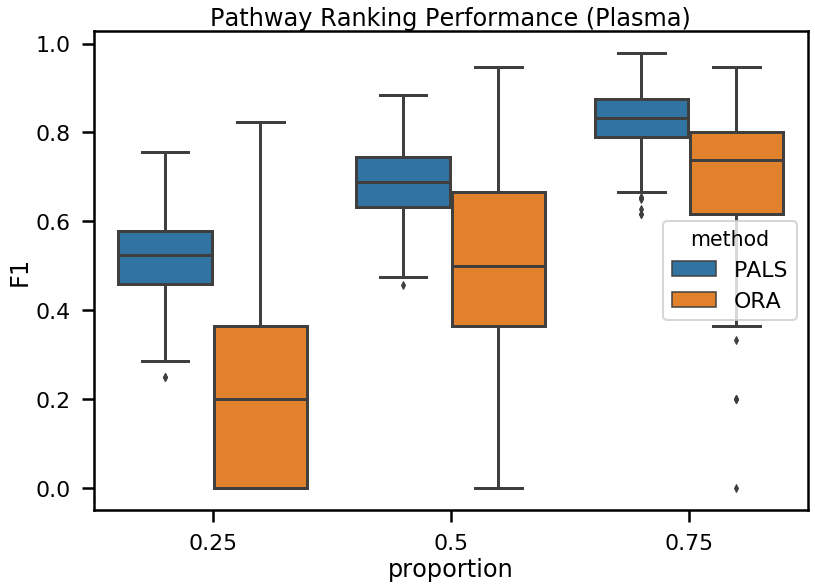

In [10]:
sns.boxplot(x='proportion', y='F1', hue='method', data=plasma_df)
plt.title('Pathway Ranking Performance (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma.eps'), dpi=300)

### CSF

In [11]:
experiment_name = 'csf'
csf_df = evaluate_performance(results, experiment_name)
save_obj(csf_df, os.path.join(base_dir, 'csf_df.p'))
csf_df

,method,proportion,i,TP,FP,FN,precision,recall,F1
0,PALS,0.25,0,38,4,51,0.904762,0.426966,0.580153
1,ORA,0.25,0,13,0,30,1.000000,0.302326,0.464286
2,PALS,0.25,1,53,5,36,0.913793,0.595506,0.721088
3,ORA,0.25,1,25,10,18,0.714286,0.581395,0.641026
4,PALS,0.25,2,39,5,50,0.886364,0.438202,0.586466
...,...,...,...,...,...,...,...,...,...
2995,ORA,0.75,497,36,4,7,0.900000,0.837209,0.867470
2996,PALS,0.75,498,81,4,8,0.952941,0.910112,0.931034
2997,ORA,0.75,498,37,4,6,0.902439,0.860465,0.880952
2998,PALS,0.75,499,74,6,15,0.925000,0.831461,0.875740


In [73]:
csf_df[csf_df['method'] == 'PALS'].groupby('proportion').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.25,500.0,0.680019,0.108252,0.271845,0.606785,0.704314,0.765633,0.875740
0.50,500.0,0.828140,0.061706,0.569231,0.802469,0.843373,0.870189,0.928962
0.75,500.0,0.921011,0.026601,0.731034,0.908046,0.923527,0.938547,0.983051


In [74]:
csf_df[csf_df['method'] == 'ORA'].groupby('proportion').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.25,500.0,0.557344,0.154290,0.000000,0.464286,0.590164,0.668675,0.835443
0.50,500.0,0.767648,0.065598,0.482759,0.737782,0.777778,0.814815,0.913580
0.75,500.0,0.881971,0.036855,0.714286,0.860759,0.883721,0.904762,0.988235


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


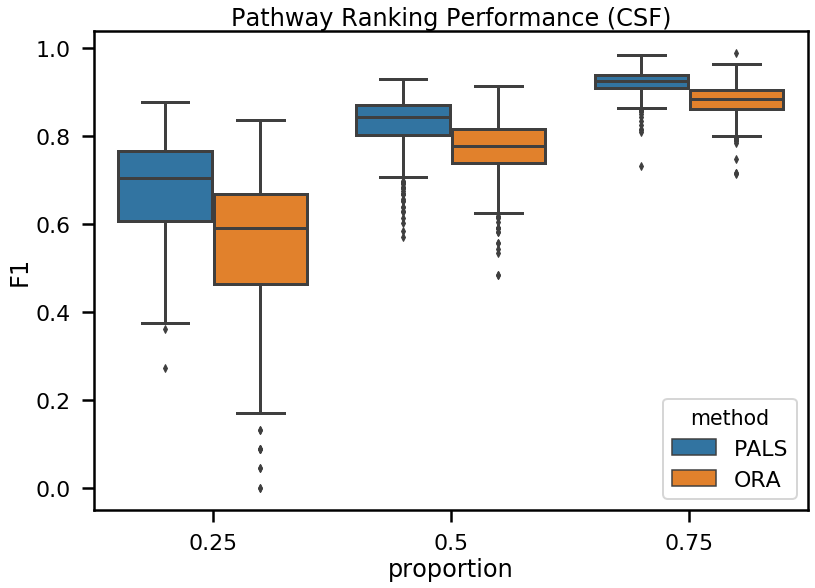

In [12]:
sns.boxplot(x='proportion', y='F1', hue='method', data=csf_df)
plt.title('Pathway Ranking Performance (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf.eps'), dpi=300)

### Combined Plot

In [13]:
plasma_df['data'] = 'Plasma'
csf_df['data'] = 'CSF'

In [14]:
df = pd.concat([plasma_df, csf_df])
df.shape

(6000, 10)

In [15]:
df

,method,proportion,i,TP,FP,FN,precision,recall,F1,data
0,PALS,0.25,0,10,8,13,0.555556,0.434783,0.487805,Plasma
1,ORA,0.25,0,3,0,6,1.000000,0.333333,0.500000,Plasma
2,PALS,0.25,1,15,7,8,0.681818,0.652174,0.666667,Plasma
3,ORA,0.25,1,0,1,9,0.000000,0.000000,0.000000,Plasma
4,PALS,0.25,2,11,5,12,0.687500,0.478261,0.564103,Plasma
...,...,...,...,...,...,...,...,...,...,...
2995,ORA,0.75,497,36,4,7,0.900000,0.837209,0.867470,CSF
2996,PALS,0.75,498,81,4,8,0.952941,0.910112,0.931034,CSF
2997,ORA,0.75,498,37,4,6,0.902439,0.860465,0.880952,CSF
2998,PALS,0.75,499,74,6,15,0.925000,0.831461,0.875740,CSF


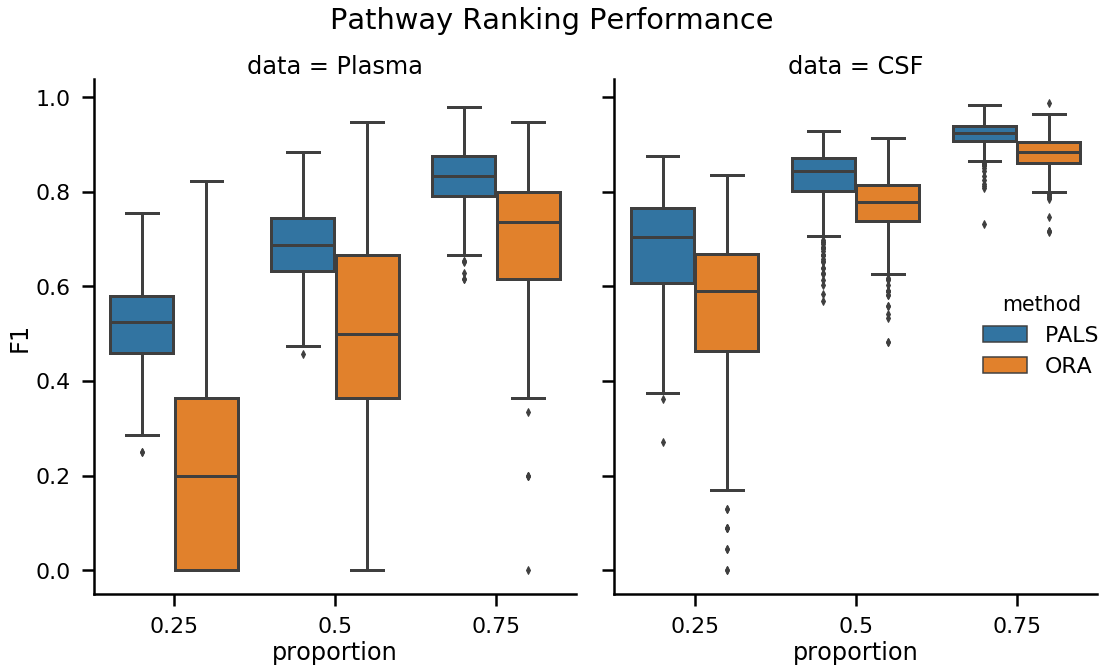

In [32]:
g = sns.catplot(x="proportion", y="F1", hue="method", col="data", data=df, kind="box", height=10, aspect=0.7)
plt.suptitle('Pathway Ranking Performance')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation.eps'), dpi=300)

#### True Positives

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


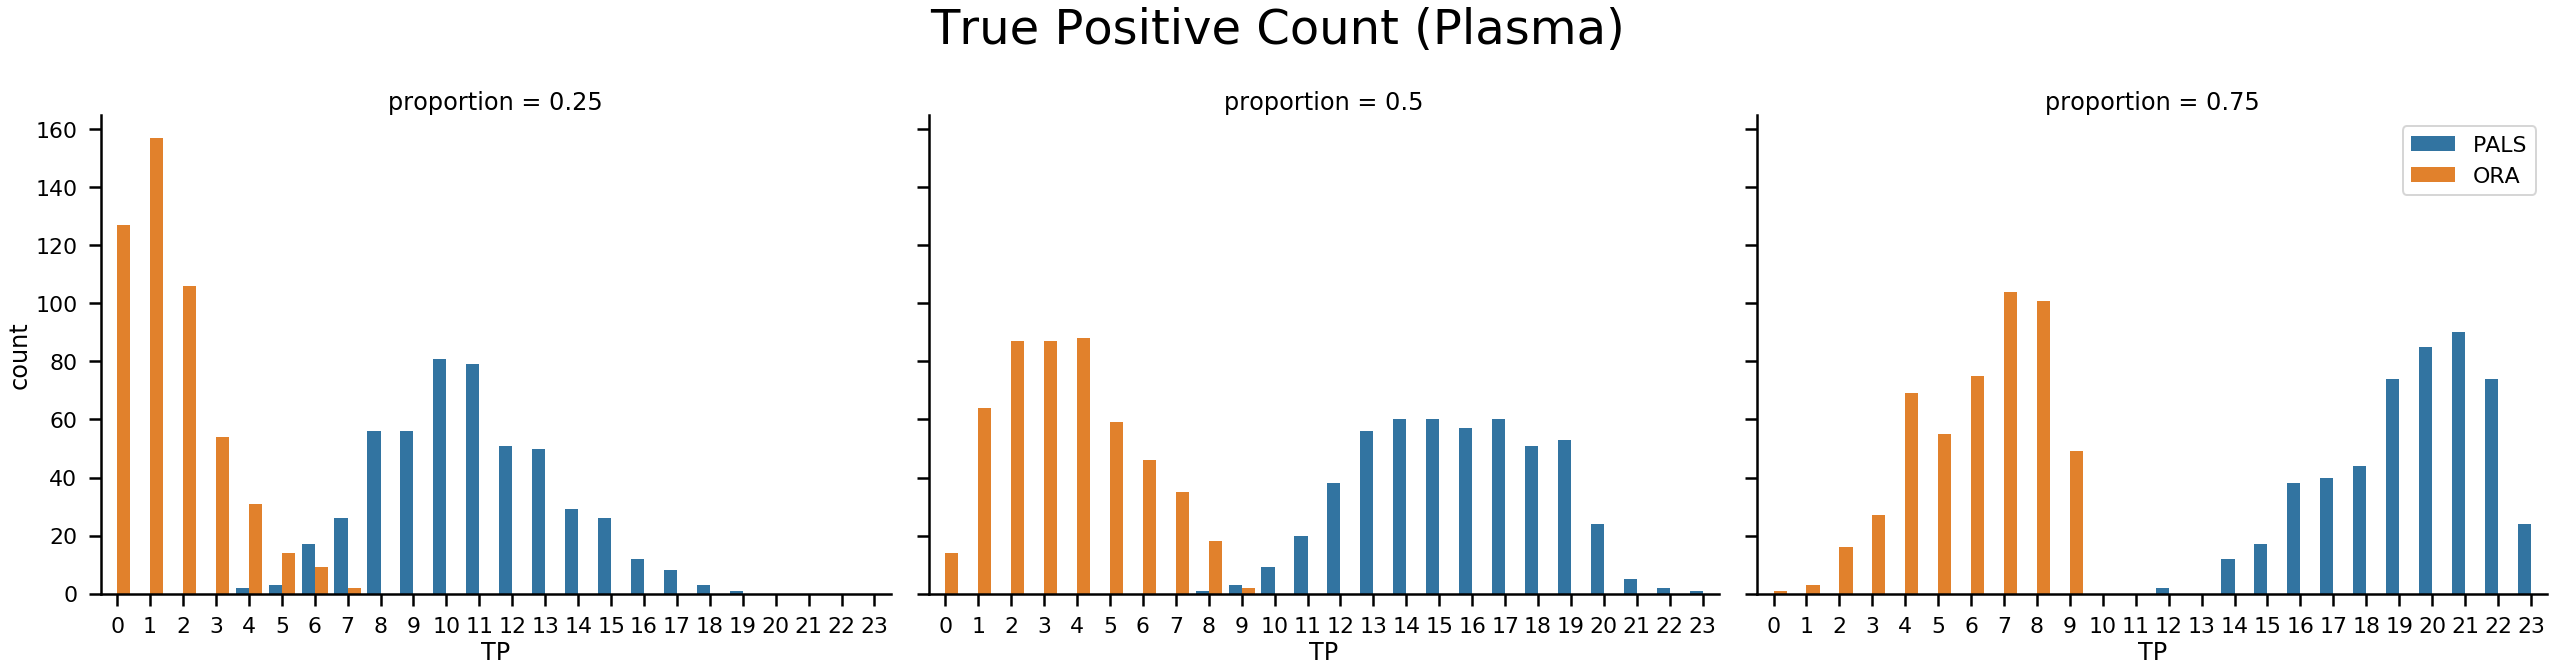

In [58]:
g = sns.catplot(x="TP", col='proportion', hue="method", data=plasma_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_TP.eps'), dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


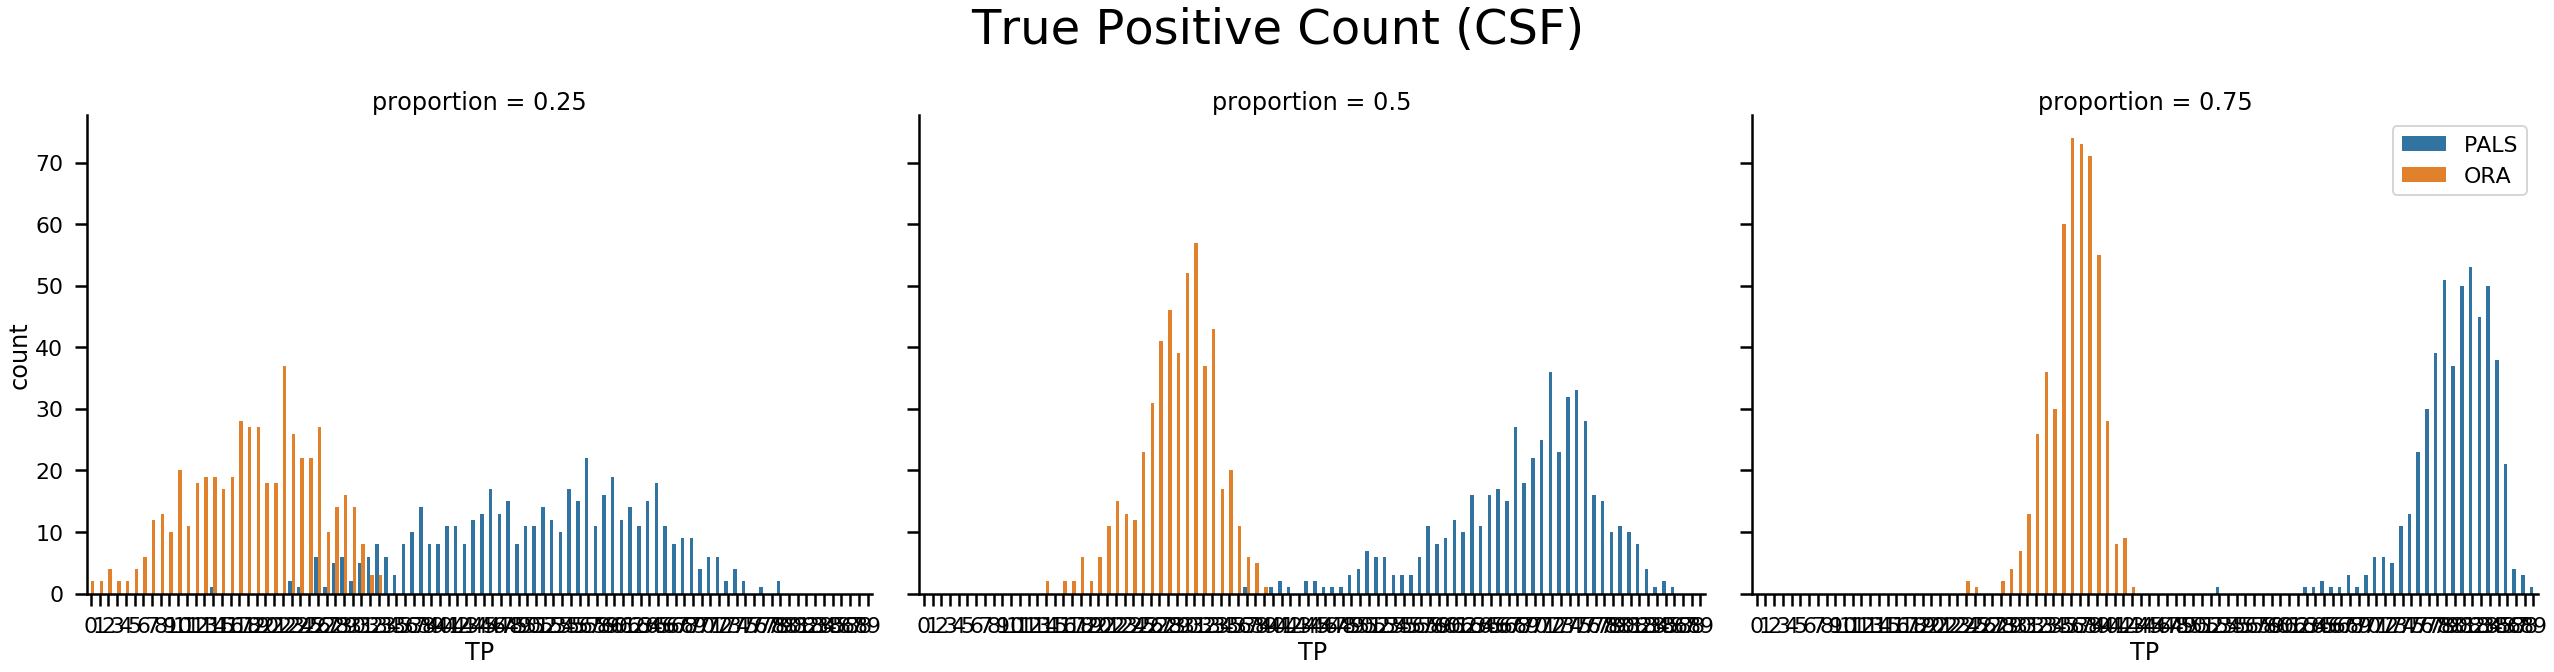

In [59]:
g = sns.catplot(x="TP", col='proportion', hue="method", data=csf_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_TP.eps'), dpi=300)

#### False Positives

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


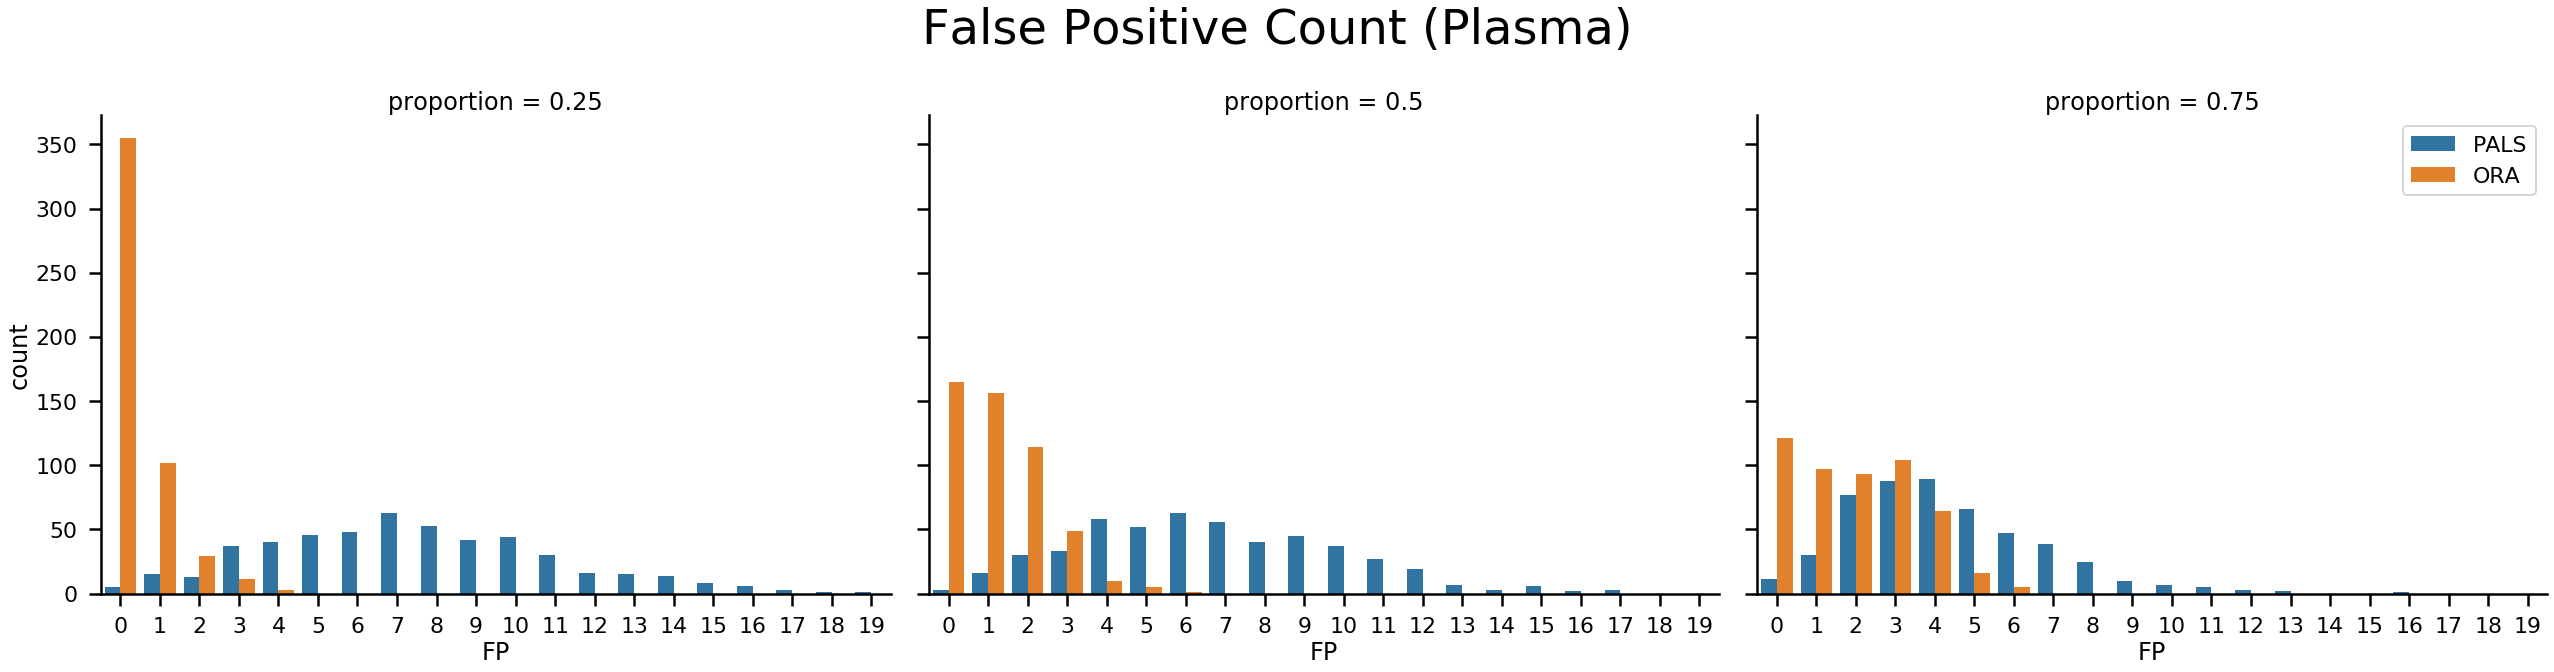

In [60]:
g = sns.catplot(x="FP", col='proportion', hue="method", data=plasma_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FP.eps'), dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


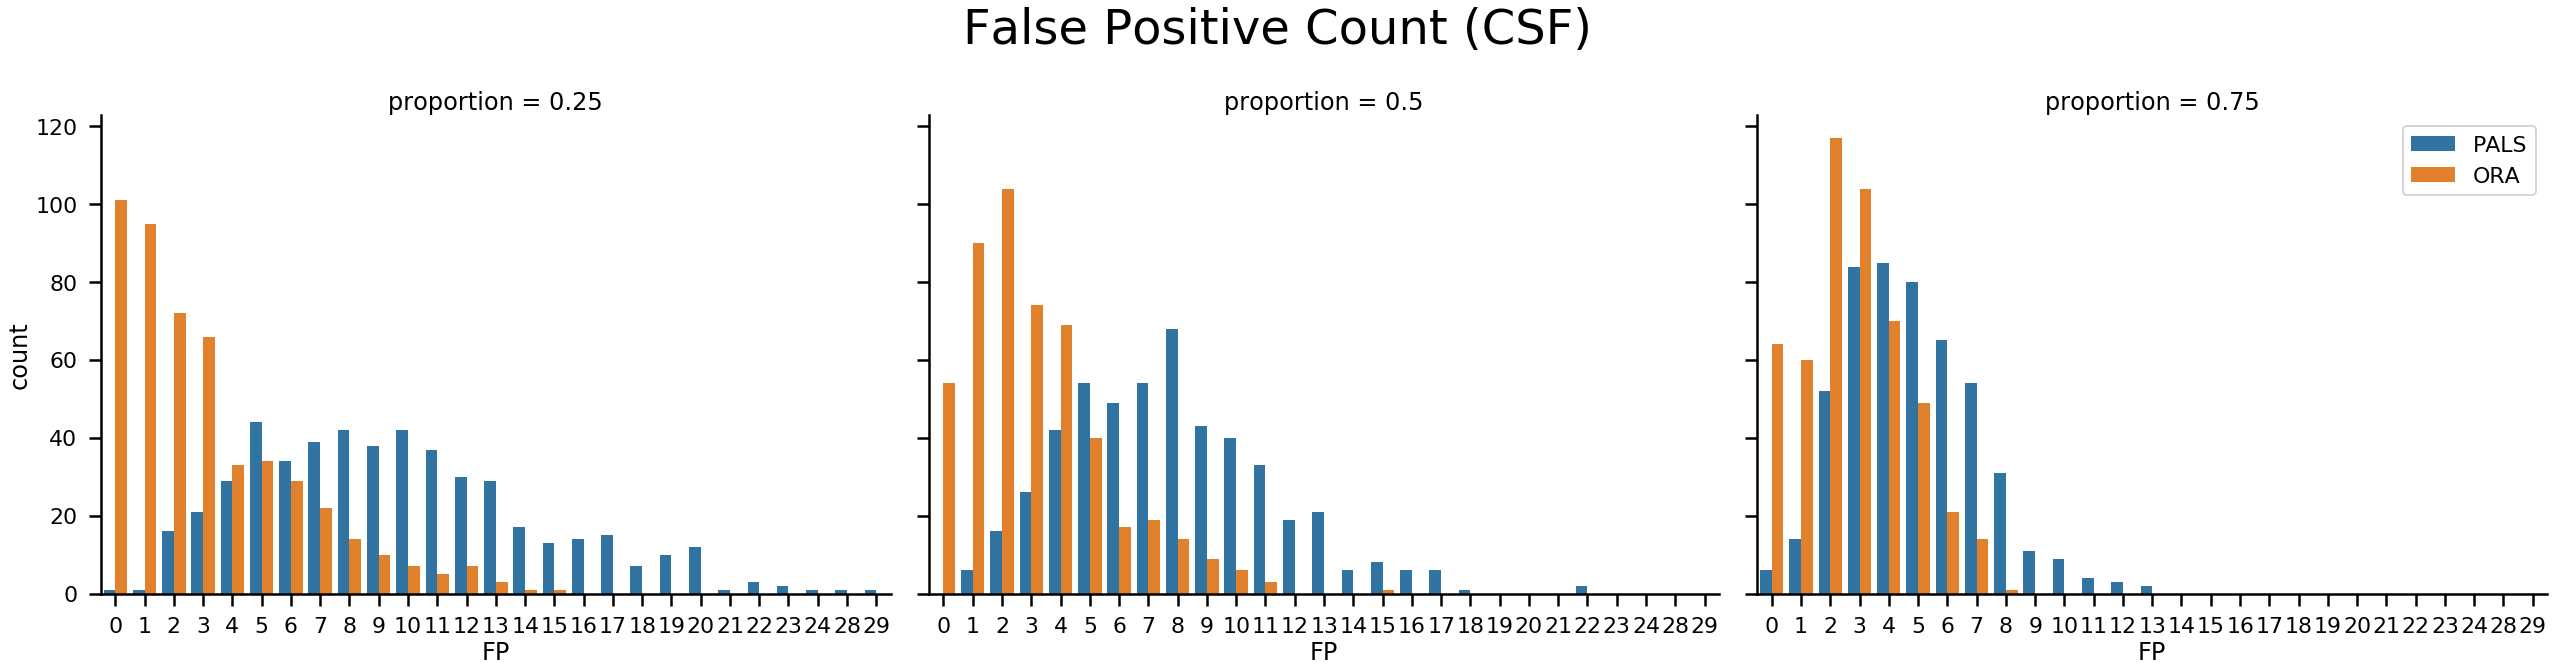

In [61]:
g = sns.catplot(x="FP", col='proportion', hue="method", data=csf_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FP.eps'), dpi=300)

#### False Negatives

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


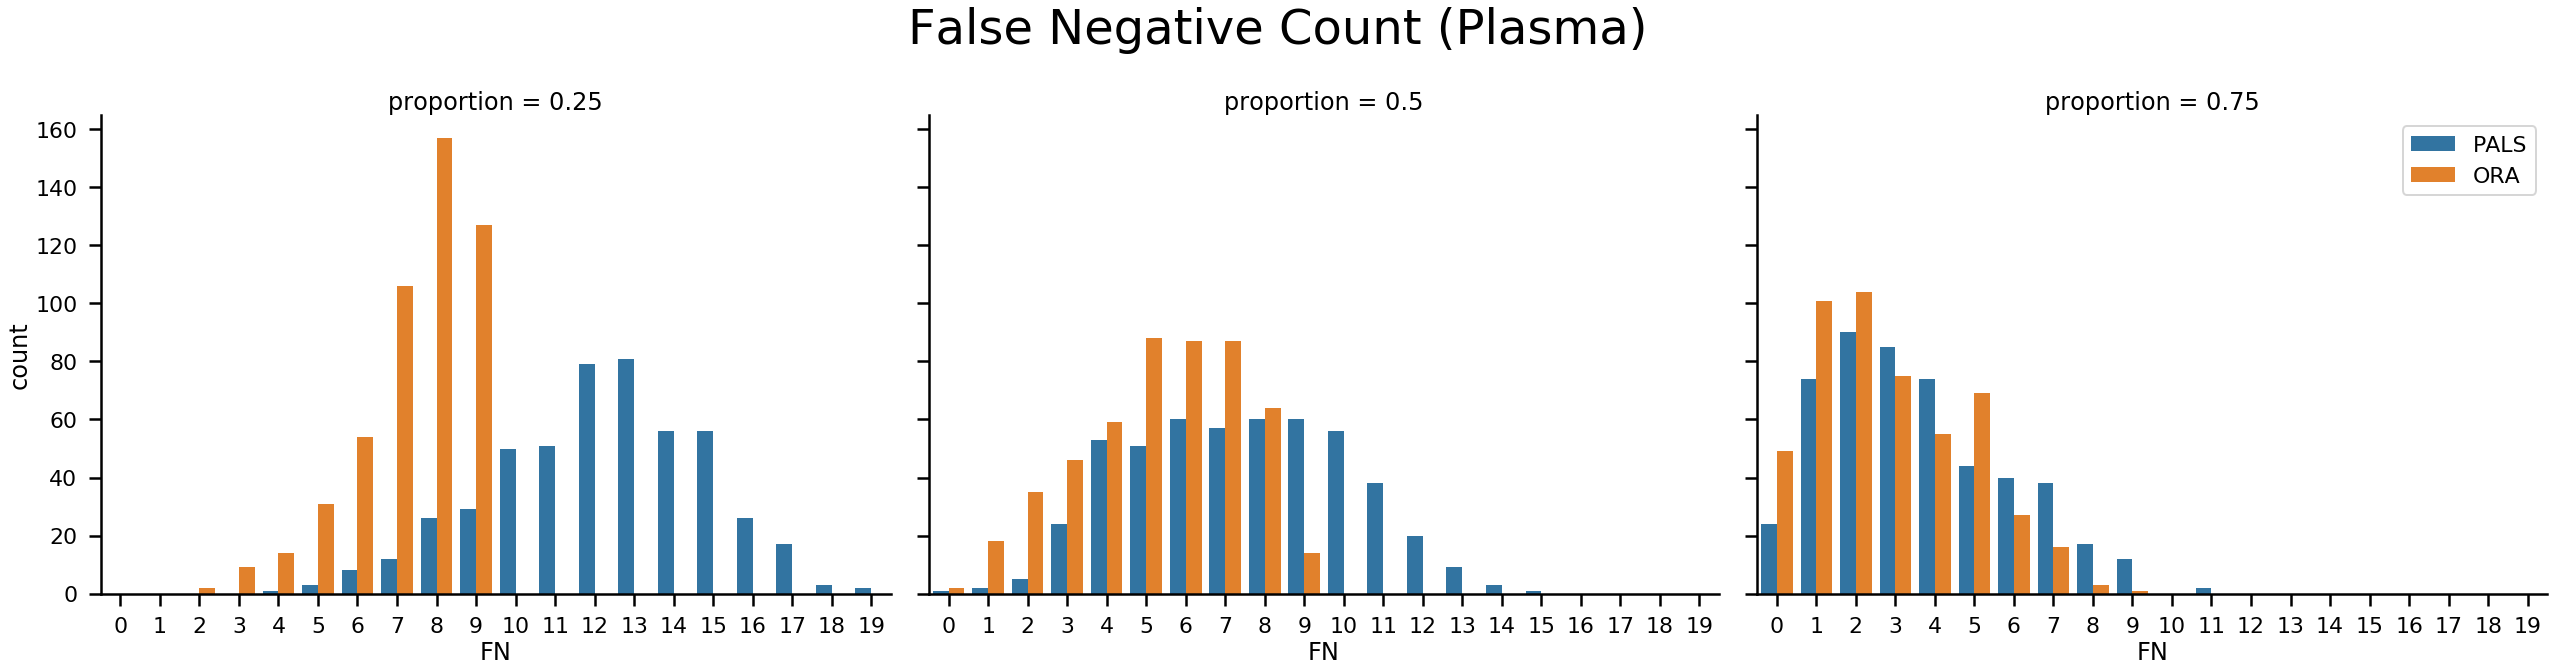

In [62]:
g = sns.catplot(x="FN", col='proportion', hue="method", data=plasma_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FN.eps'), dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


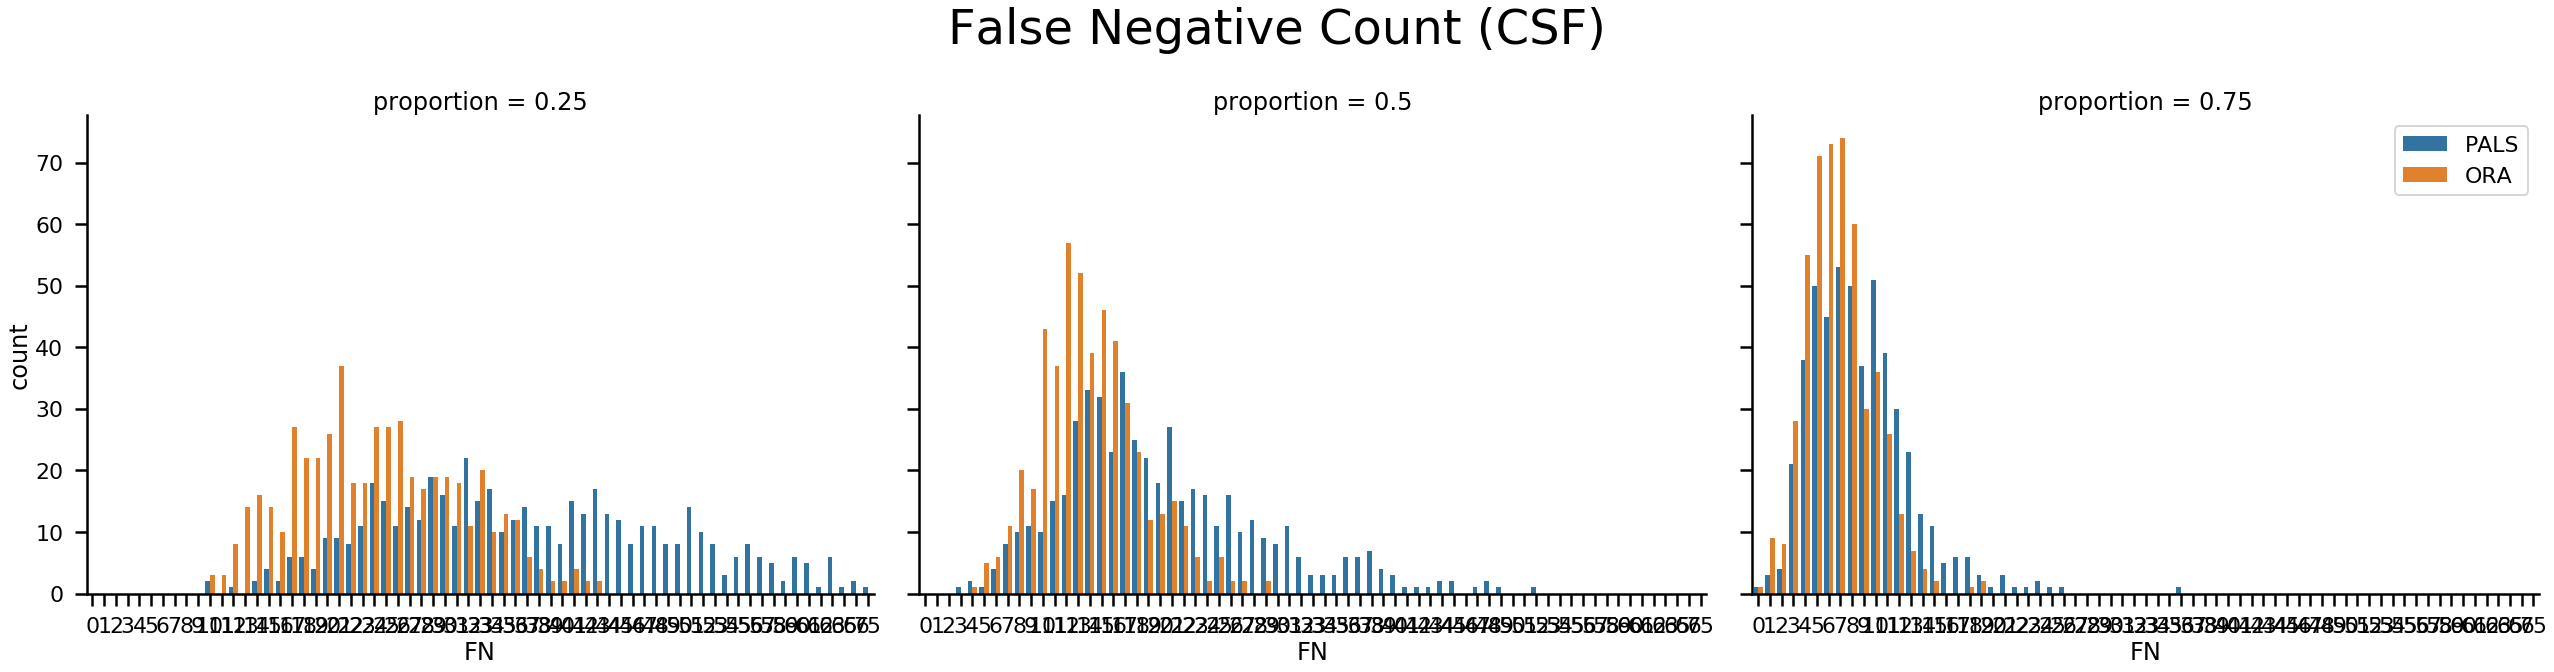

In [63]:
g = sns.catplot(x="FN", col='proportion', hue="method", data=csf_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FN.eps'), dpi=300)